In [119]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

import warnings

import csv

import datetime



warnings.filterwarnings('ignore')

pd.plotting.register_matplotlib_converters()

In [120]:
df = pd.read_csv('data2.csv', parse_dates=['Timestamp'], encoding = 'utf-16')

df.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity
0,twitter,1552760166,Mooi verhaal over windmolens https://www.insta...,Null,1.0,0.0,0.70,1.00
1,twitter,1552995709,Het mooiste happy hour was afgelopen zaterdag....,Null,0.0,0.0,0.00,0.00
2,twitter,1553001655,Dus bij jou in de achtertuin windmolensvoortui...,Null,0.0,0.0,0.00,0.00
3,twitter,1552471319,Hoe kan provincie zorgen voor bouw van genoeg ...,Null,0.0,0.0,0.20,0.50
4,twitter,1552993305,We zijn geen communistisch land. Een vliegveld...,Null,0.0,0.0,0.19,0.58


In [121]:
df['Timestamp']= pd.to_datetime(df['Timestamp'], unit='s')

df.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity
0,twitter,2019-03-16 18:16:06,Mooi verhaal over windmolens https://www.insta...,Null,1.0,0.0,0.70,1.00
1,twitter,2019-03-19 11:41:49,Het mooiste happy hour was afgelopen zaterdag....,Null,0.0,0.0,0.00,0.00
2,twitter,2019-03-19 13:20:55,Dus bij jou in de achtertuin windmolensvoortui...,Null,0.0,0.0,0.00,0.00
3,twitter,2019-03-13 10:01:59,Hoe kan provincie zorgen voor bouw van genoeg ...,Null,0.0,0.0,0.20,0.50
4,twitter,2019-03-19 11:01:45,We zijn geen communistisch land. Een vliegveld...,Null,0.0,0.0,0.19,0.58


In [122]:
# load data


3


# remove outlier record

df = df.loc[df['Timestamp'] > '2007-01-01']

# FEATURE EXTRACTION

# month, for seasonality
df['month'] = 0
df['weekday'] = df['Timestamp'].dt.weekday
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year

# days_since_first, for trend
df['days_since_first'] = 0
df['days_since_first'] = (df['Timestamp'] - min(df['Timestamp'])).dt.days



# create test design

train_filter = df['Timestamp'] < '2017-08-01'

df_train = df[train_filter]

df_test = df[(df['Timestamp'] > '2017-05-08') & (df['Timestamp'] < '2017-05-29')]

print(df['weekday'])

0       5
1       1
2       1
3       2
4       1
5       1
6       0
7       3
8       2
9       2
10      0
11      6
12      0
13      0
14      5
15      1
16      1
17      0
18      3
19      1
20      1
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      6
       ..
2702    2
2703    1
2704    2
2705    0
2706    3
2707    6
2708    1
2709    4
2710    5
2711    4
2712    3
2713    3
2714    2
2715    1
2716    4
2717    3
2719    6
2720    6
2721    4
2722    4
2723    4
2724    3
2725    2
2726    2
2727    4
2728    4
2729    4
2730    3
2731    3
2732    4
Name: weekday, Length: 2569, dtype: int64


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2732
Data columns (total 12 columns):
Origin              2569 non-null object
Timestamp           2569 non-null datetime64[ns]
Content             2569 non-null object
Title               2569 non-null object
Comment_count       2569 non-null float64
Retweet_count       2569 non-null float64
Polarity            2569 non-null float64
Subjectivity        2569 non-null float64
month               2569 non-null int64
weekday             2569 non-null int64
year                2569 non-null int64
days_since_first    2569 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 260.9+ KB


In [124]:
print(df_train.count(), df_test.count())

Origin              1888
Timestamp           1888
Content             1888
Title               1888
Comment_count       1888
Retweet_count       1888
Polarity            1888
Subjectivity        1888
month               1888
weekday             1888
year                1888
days_since_first    1888
dtype: int64 Origin              10
Timestamp           10
Content             10
Title               10
Comment_count       10
Retweet_count       10
Polarity            10
Subjectivity        10
month               10
weekday             10
year                10
days_since_first    10
dtype: int64


In [125]:
# select features

# one-hot-encode month, to let the linear model recognize monthly seasonality

# features = ['month']

# ohe = OneHotEncoder(categorical_features=[0])

# x_train = ohe.fit_transform(df_train[features].astype(int))

# x_test = ohe.transform(df_test[features].astype(int))



# define targets

target = 'Polarity'

y_train = df_train[target]

y_test = df_test[target]



# # fit and aply linear regression model
import numpy as np

x_train = np.column_stack((df_train['weekday'], df_train['Subjectivity'])).astype(int)
x_test = np.column_stack((df_test['weekday'], df_test['Subjectivity'])).astype(int)
y_test = df_test[target]

model = LinearRegression()

model.fit(x_train, y_train)

pred_train = model.predict(x_train)

pred_test = model.predict(x_test)

df_test['predictions'] = pred_test

df_test.head()

,Origin,Timestamp,Content,Title,Comment_count,Retweet_count,Polarity,Subjectivity,month,weekday,year,days_since_first,predictions
791,twitter,2017-05-14 19:24:40,Olie-lekkende windmolens: u zal dat niet lezen...,Null,4.0,32.0,0.275000,0.550000,5,6,2017,3614,0.056846
792,twitter,2017-05-13 21:08:08,Vincent van Gogh tekende windmolens. Geen boor...,Null,1.0,16.0,-0.650000,0.900000,5,5,2017,3613,0.054403
793,twitter,2017-05-13 19:29:32,Moet dit nog zien lukken maar de wereld gaat i...,Null,4.0,23.0,0.000000,0.900000,5,5,2017,3613,0.054403
794,twitter,2017-05-12 13:35:17,Windmolens nabij woningen zijn illegaal dat is...,Null,26.0,20.0,-0.166667,0.333333,5,4,2017,3612,0.051960
795,twitter,2017-05-12 13:10:57,Stop de hype van de windmolens en zonnepanelen...,Null,3.0,31.0,0.000000,0.900000,5,4,2017,3612,0.051960


In [126]:
df.corr()

,Comment_count,Retweet_count,Polarity,Subjectivity,month,weekday,year,days_since_first
Comment_count,1.000000,0.647040,-0.002840,0.072814,0.014166,0.021587,0.167124,0.171918
Retweet_count,0.647040,1.000000,0.003935,0.048564,0.005847,0.039974,0.190919,0.195411
Polarity,-0.002840,0.003935,1.000000,0.228086,0.019913,0.021780,0.011599,0.014080
Subjectivity,0.072814,0.048564,0.228086,1.000000,-0.001238,-0.008586,0.152434,0.154934
month,0.014166,0.005847,0.019913,-0.001238,1.000000,-0.035309,-0.225061,-0.117588
weekday,0.021587,0.039974,0.021780,-0.008586,-0.035309,1.000000,0.035078,0.031749
year,0.167124,0.190919,0.011599,0.152434,-0.225061,0.035078,1.000000,0.994013
days_since_first,0.171918,0.195411,0.014080,0.154934,-0.117588,0.031749,0.994013,1.000000


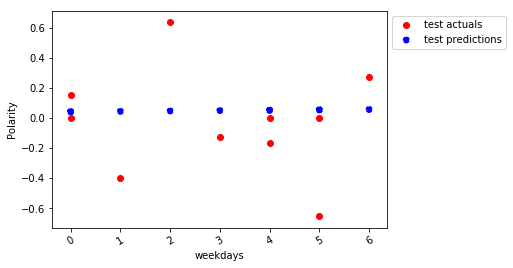

In [128]:
# plt.plot(df_train['Timestamp'], pred_train, label='train predictions', linestyle='--', color='blue')

# plt.plot(df_train['Timestamp'], y_train, label='train actuals', linestyle='-', color='blue'

plt.scatter( df_test['weekday'], y_test,label='test actuals', linestyle='-', color='red')

plt.scatter( df_test['weekday'], pred_test, label='test predictions', linestyle='--', color='blue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.xticks(rotation=30)

plt.ylabel(target)
plt.xlabel('weekdays')

plt.show()


In [ ]:
from sklearn.metrics import r2_score
model.coef_

r2_score(df_test['Polarity'], pred_test) 